# Deskripsi Proyek
Operator seluler Megaline merasa tidak puas karena sebagian besar pelanggan mereka masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah model yang bisa menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.
Kamu punya akses untuk data perilaku para pelanggan yang sudah beralih ke paket terbaru (dari proyek kursus Analisis Data Statistik). Dalam tugas klasifikasi ini, kamu perlu mengembangkan sebuah model yang mampu memilih paket dengan tepat. Nah, karena kamu sudah menyelesaikan langkah pra-pemrosesan data, kamu bisa langsung lanjut ke tahapan pembuatan model.
Kembangkan sebuah model dengan tingkat accuracy yang setinggi-tingginya. Di proyek ini, ambang batas untuk tingkat accuracy adalah 0,75. Jangan lupa untuk memeriksa tingkat accuracy modelmu menggunakan test dataset, ya.

# Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

# Tujuan
Untuk membantu Perusahaan Operator seluler Megaline yang ingin mengembangkan sebuah model yang bisa menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.

# Langkah Pengerjaan:
    1. Buka dan periksa file data secara teliti. File path: /datasets/users_behavior.csv. Unduh dataset.
    2. Pisahkan data sumber menjadi training set, validation set, dan test set.
    3. Periksa kualitas model yang berbeda dengan mengubah hyperparameter. Jelaskan secara singkat semua temuan yang kamu dapatkan dari penelitian ini.
    4. Periksa kualitas model menggunakan test set.
    5. Tugas tambahan: lakukan sanity check terhadap model. Data ini lebih kompleks dari data-data yang pernah kamu kerjakan sebelumnya. Jadi, ini memang bukan tugas yang mudah. Kita akan mempelajarinya lebih jauh nanti.

# Deskripsi data
Setiap observasi dalam dataset yang kita miliki memuat informasi perilaku bulanan tentang satu pengguna. Informasi tersebut mencakup: 
- сalls — jumlah panggilan
- minutes — total durasi panggilan dalam satuan menit
- messages — jumlah pesan teks
- mb_used — traffic penggunaan internet dalam satuan MB
- is_ultimate — paket untuk bulan yang sedang berjalan (Ultimate - 1, Surf - 0)

## Buka File Data dan Pelajari Informasi Umumnya
Buka dan periksa file data secara teliti. File path: /datasets/users_behavior.csv. Kemudian unduh dataset.

###  Buka File Data

In [1]:
# Import Library Data Processing
import pandas as pd
import numpy as np

# Import Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library Statistics
import scipy.stats as st
from scipy import stats


In [2]:
# Muat file data
data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
# Informasi umum
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Cek Duplikasi Data
print('Data Duplicate :', data.duplicated().sum())

Data Duplicate : 0


**Kesimpulan**
- Tidak terdapat data yang hilang (missing values)
- Tidak ada duplikasi data

## Pisahkan Data Sumber
Pisahkan data sumber menjadi training set, validation set, dan test set.

In [6]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split

In [7]:
# Pisahkan data menjadi training set
data_train, data_rest = train_test_split(data, test_size=0.6, random_state=12345)


In [8]:
# Pisahkan sisa data menjadi validation set
data_valid, data_test = train_test_split(data_rest, test_size=0.25, random_state=12345)

In [9]:
# Pisahkan fitur (features) dan target (label)
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']


In [10]:
# Tampilkan informasi tentang jumlah baris dan kolom
print("features_train :", features_train.shape)
print("target_train :", target_train.shape)
print("features_valid :", features_valid.shape)
print("target_valid :", target_valid.shape)
print("features_test :", features_valid.shape)
print("target_test :", target_valid.shape)

features_train : (1285, 4)
target_train : (1285,)
features_valid : (1446, 4)
target_valid : (1446,)
features_test : (1446, 4)
target_test : (1446,)


**Kesimpulan**

Pada tahap pemisahan data sumber diketahui informasi sebagai berikut:
- features_train : memiliki 1285 baris dan 4 kolom
- target_train : memiliki 1285 baris
- features_valid : memiliki 1446 dan 4 kolom
- target_valid : memiliki 1446 baris
- features_test : memiliki 1446 dan 4 kolom
- target_test : memiliki 1446 baris

## Periksa kualitas model
Periksa kualitas model yang berbeda dengan mengubah hyperparameter. Jelaskan secara singkat semua temuan yang kamu dapatkan dari penelitian ini.

### Latih Decision Tree

In [11]:
# Import library yang diperlukan
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Buat loop untuk max_depth dari 1 sampai 3
for depth in range(1, 4):
    # Inisialisasi model Decision Tree dengan kedalaman yang berbeda
    dt_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # Latih model Decision Tree pada training set
    dt_model.fit(features_train, target_train)
    # Prediksi pada validation set
    dt_predictions = dt_model.predict(features_valid)
    # Evaluasi akurasi model Decision Tree
    dt_accuracy = accuracy_score(target_valid, dt_predictions)


In [13]:
print('max_depth =', depth, "Akurasi Decision Tree:", dt_accuracy)

max_depth = 3 Akurasi Decision Tree: 0.7980636237897649


### Latih Random Forest 

In [14]:
# Import library yang diperlukan
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Buat loop untuk n_estimators dari 1 hingga 10
for n_estimators in range(1, 11):
    # Inisialisasi model Random Forest dengan jumlah estimator yang berbeda
    rf_model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators)
    # Latih model Random Forest pada training set
    rf_model.fit(features_train, target_train)
    # Prediksi pada validation set
    rf_predictions = rf_model.predict(features_valid)
    # Evaluasi akurasi model Random Forest
    rf_accuracy = accuracy_score(target_valid, rf_predictions)

In [16]:
print("n-estimators =", n_estimators, "Akurasi Random Forest", rf_accuracy)

n-estimators = 10 Akurasi Random Forest 0.7911479944674965


### Latih Regresi Logistik

In [17]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression

In [18]:
# Inisialisasi model Regresi Logistik
logistic_model = LogisticRegression(random_state=12345, solver='liblinear')

In [19]:
# Latih model Regresi Logistik pada training set
logistic_model.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='liblinear')

In [20]:
# Hitung skor accuracy pada training set
score_train = logistic_model.score(features_train, target_train)

In [21]:
# Hitung skor accuracy pada validation set
score_valid = logistic_model.score(features_valid, target_valid)

In [22]:
print("Accuracy model regresi logistik berdasarkan training set:", score_train)
print("Accuracy model regresi logistik berdasarkan validation set:", score_valid)

Accuracy model regresi logistik berdasarkan training set: 0.7400778210116732
Accuracy model regresi logistik berdasarkan validation set: 0.7565698478561549


**Kesimpulan**
- Decision Tree:
Dengan menggunakan 'max_depth = 3' didapatkan akurasi sekitar 0.798
- Random Forest:
Dengan menggunakan jumlah 'n_estimators = 10' didapatkan akurasi sekitar 0.791
- Regresi Logistik:
Model ini memiliki akurasi sekitar 0.740 pada training set dan 0.757 pada validation set.

Sehingga dapat dilihat dai kesimpulan diatas 2 model yang memiliki akurasi berdekatan adalah Decision Tree dan Random Forest. Decision Tree memiliki akurasi sedikit lebih tinggi dibandingkan Random Forest.

## Periksa Kualitas Model
Periksa kualitas model menggunakan test set.

### Periksa Kualitas Model Decision Tree

In [23]:
# Gunakan model Decision Tree dengan max_depth = 3
best_dt_model = DecisionTreeClassifier(random_state=12345, max_depth=3)
best_dt_model.fit(features_train, target_train)
dt_test_predictions = best_dt_model.predict(features_test)

In [24]:
# Evaluasi akurasi model Decision Tree pada test set
dt_test_accuracy = accuracy_score(target_test, dt_test_predictions)
print("Akurasi Decision Tree pada test set:", dt_test_accuracy)

Akurasi Decision Tree pada test set: 0.7805383022774327


In [25]:
# Fungsi untuk menghitung jumlah kesalahan
def error_count(answers, predictions):
    count = 0
    for i in range(len(answers)):
        if answers[i] != predictions[i]:
            count += 1
    return count

In [26]:
# Hitung jumlah kesalahan antara target_test dan dt_test_predictions
error_count_dt = (target_test.values != dt_test_predictions).sum()
print('Jumlah kesalahan Decision Tree:', error_count_dt)

Jumlah kesalahan Decision Tree: 106


### Periksa Kualitas Model Random Forest

In [27]:
# Gunakan model Random Forest dengan n_estimators = 10
best_rf_model = RandomForestClassifier(random_state=12345, n_estimators=10)
best_rf_model.fit(features_train, target_train)
rf_test_predictions = best_rf_model.predict(features_test)

In [28]:
# Evaluasi akurasi model Random Forest pada test set
rf_test_accuracy = accuracy_score(target_test, rf_test_predictions)
print("Akurasi Random Forest pada test set:", rf_test_accuracy)

Akurasi Random Forest pada test set: 0.7639751552795031


In [29]:
# Hitung jumlah kesalahan pada test set untuk Random Forest
error_count_rf = (target_test.values != rf_test_predictions).sum()
print('Jumlah kesalahan Random Forest:', error_count_rf)

Jumlah kesalahan Random Forest: 114


### Periksa Kualitas Model Regresi Logistik

In [30]:
# Gunakan model Regresi Logistik
logistic_model = LogisticRegression(random_state=12345, solver='liblinear')
logistic_model.fit(features_train, target_train)
logistic_test_predictions = logistic_model.predict(features_test)


In [31]:
# Evaluasi akurasi model Regresi Logistik pada test set
logistic_test_accuracy = accuracy_score(target_test, logistic_test_predictions)
print("Akurasi Regresi Logistik pada test set:", logistic_test_accuracy)


Akurasi Regresi Logistik pada test set: 0.7432712215320911


In [32]:
# Hitung jumlah kesalahan pada test set untuk Regresi Logistik
error_count_logistic = (target_test.values != logistic_test_predictions).sum()
print('Jumlah kesalahan Regresi Logistik:', error_count_logistic)

Jumlah kesalahan Regresi Logistik: 124


**Kesimpulan**
- Decision Tree memiliki akurasi sekitar 0.780 dengan 106 kesalahan.
- Random Forest memiliki akurasi sekitar 0.764 dengan 114 kesalahan.
- Regresi Logistik memiliki akurasi sekitar 0.743 dengan 124 kesalahan.

Berdasarkan hasil perbandingan model diatas, dapat disimpulkan bahwa model Decision Tree memiliki akurasi yang paling tinggi di antara ketiga model dan jumlah kesalahan yang paling rendah di antara ketiga model. 

## Sanity Check / Cek Distribusi Target

In [33]:
# Import library yang diperlukan
from sklearn.metrics import classification_report

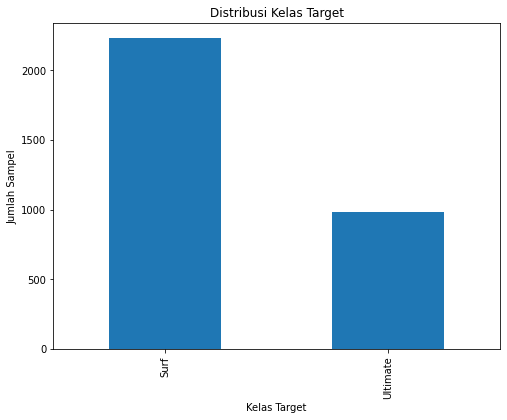

In [34]:
# Grafik distribusi kelas target
plt.figure(figsize=(8, 6))
data['is_ultra'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.xticks([0, 1], ['Surf', 'Ultimate'])
plt.show()

In [35]:
# Evaluasi model pada data test set
dt_test_predictions = best_dt_model.predict(features_test)

In [36]:
# Tampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(target_test, dt_test_predictions))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       345
           1       0.70      0.41      0.51       138

    accuracy                           0.78       483
   macro avg       0.75      0.67      0.69       483
weighted avg       0.77      0.78      0.76       483



In [37]:
# Persentase distribusi target
total_samples = len(data)
class_distribution = data['is_ultra'].value_counts(normalize=True) * 100
print("Distribusi Kelas Target (dalam persentase):")
print(class_distribution)

Distribusi Kelas Target (dalam persentase):
0    69.352831
1    30.647169
Name: is_ultra, dtype: float64


## Kesimpulan Umum
**Kesimpulan Tahap 1**
- Tidak terdapat data yang hilang (missing values)
- Tidak ada duplikasi data

**Kesimpulan Tahap 2**

Pada tahap pemisahan data sumber diketahui informasi sebagai berikut:
- features_train : memiliki 1285 baris dan 4 kolom
- target_train : memiliki 1285 baris
- features_valid : memiliki 1446 dan 4 kolom
- target_valid : memiliki 1446 baris
- features_test : memiliki 1446 dan 4 kolom
- target_test : memiliki 1446 baris

**Kesimpulan Tahap 3**

- Decision Tree: Dengan menggunakan 'max_depth = 3' didapatkan akurasi sekitar 0.798
- Random Forest: Dengan menggunakan jumlah 'n_estimators = 10' didapatkan akurasi sekitar 0.791
- Regresi Logistik: Model ini memiliki akurasi sekitar 0.740 pada training set dan 0.757 pada validation set.

Sehingga dapat dilihat dai kesimpulan diatas 2 model yang memiliki akurasi berdekatan adalah Decision Tree dan Random Forest. Decision Tree memiliki akurasi sedikit lebih tinggi dibandingkan Random Forest.


**Kesimpulan Tahap 4**

- Decision Tree memiliki akurasi sekitar 0.780 dengan 106 kesalahan.
- Random Forest memiliki akurasi sekitar 0.764 dengan 114 kesalahan.
- Regresi Logistik memiliki akurasi sekitar 0.743 dengan 124 kesalahan.

Berdasarkan hasil perbandingan model diatas, dapat disimpulkan bahwa model Decision Tree memiliki akurasi yang paling tinggi di antara ketiga model dan jumlah kesalahan yang paling rendah di antara ketiga model.

**Kesimpulan Tahap 5**

Distribusi Kelas Target (dalam persentase):
- 0    =    69.352831
- 1    =    30.647169